### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 특성   : Weight, Length
- 타겟   : Species
- 유형   : 지도학습 / 분류 (Classification)
- 최적의 K, 즉 이웃 데이터 수 찾기 코드 추가

(1) 모듈 준비 & 데이터 준비

In [1]:
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈

In [2]:
data_file = '../DATA/fish.csv'
fishDF = pd.read_csv(data_file, usecols=[0, 1, 2])  # 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [3]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt'])
twoFishDF = fishDF[mask]
twoFishDF.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158],
      dtype='int64')

In [4]:
# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [5]:
# 'Bream', 'Smelt' 품종명 수치화
# twoFishDF = twoFishDF.replace({'Bream':0, 'Smelt':1}).copy()  # SettingWithCopyWarning 방지
# twoFishDF.loc[:, 'Species'] = twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()
# twoFishDF['Species'] = twoFishDF['Species'].astype('int64')
# twoFishDF.info()

In [6]:
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [7]:
twoFishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [8]:
# 표준 정규분포 => 평균 0, 표준편차 1 => Z-score = (피쳐 - 평균) / 표준편차
twoFishDF.Weight.mean(), twoFishDF.Weight.std()

(444.5, 328.1432328267642)

In [9]:
# Weight 컬럼
ret1 = twoFishDF.Weight - twoFishDF.Weight.mean()
ret1 = ret1 / twoFishDF.Weight.std()
# twoFishDF.loc[:, 'Weight'] = ret1

In [10]:
# Length 컬럼도 마찬가지로 정규화
ret2 = twoFishDF.Length - twoFishDF.Length.mean()
ret2 = ret2 / twoFishDF.Length.std()
# twoFishDF.loc[:, 'Length'] = ret2

(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리

In [11]:
# 피쳐/속성 데이터 추출 => 수치화, 즉 정수인코딩
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [12]:
# 클래스/타겟/라벨 데이터 추출
targetDF = twoFishDF['Species']
targetDF.head(2)

0    Bream
1    Bream
Name: Species, dtype: object

In [13]:
targetDF = targetDF.replace({'Bream':0, 'Smelt':1})
targetDF.dtype, targetDF.head(2)

(dtype('int64'),
 0    0
 1    0
 Name: Species, dtype: int64)

(3-1) 학습/테스트 데이터셋 분리 <hr>
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80 : 20

In [14]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    test_size=0.2, stratify=targetDF)

In [16]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---> \n{x_train.shape}, {y_train.shape}')
print(f'{y_train.value_counts()/y_train.shape[0]}\n')
print(f'테스트용 데이터셋 ---> \n{x_test.shape}, {y_test.shape}')
print(f'{y_test.value_counts()/y_test.shape[0]}\n')

학습용 데이터셋 ---> 
(39, 2), (39,)
Species
0    0.717949
1    0.282051
Name: count, dtype: float64

테스트용 데이터셋 ---> 
(10, 2), (10,)
Species
0    0.7
1    0.3
Name: count, dtype: float64



(3-2) 피쳐 데이터의 스케일링 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [17]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [18]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 학습 평균, 표준편차 계산 진행 : fit() 메서드
# (3) 데이터에 대한 스케일링 진행 : transform() 메서드

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(x_train)

StandardScaler()

In [21]:
scaler.mean_

array([456.05384615,  27.4025641 ])

In [22]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(39, 2)

In [23]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(10, 2)

(3-3) 데이터 시각화

In [24]:
import matplotlib.pyplot as plt

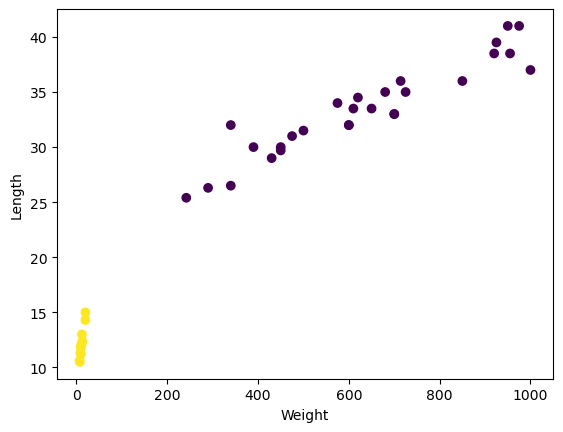

In [25]:
## 원본 데이터 시각화
plt.scatter(x_train.Weight, x_train.Length, c=y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

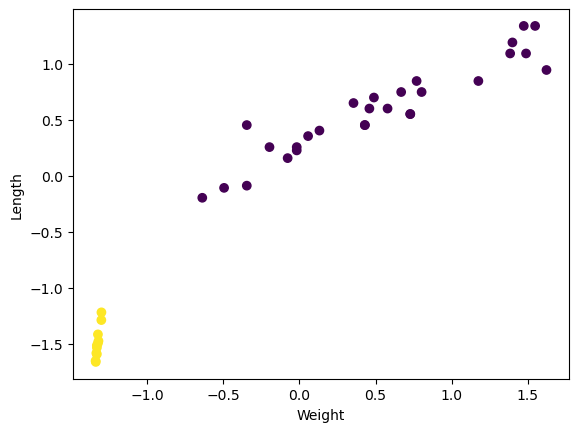

In [26]:
## 스케일된 데이터 시각화 => scaled_x_train
plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1], c=y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(4) 학습 진행

In [34]:
## 방법 1 : KNN 알고리즘
## 모델 성능 좌우하는 매개변수 => 하이퍼파라미터 : n_neighbors
## n_neighbors 즉 k 개수 : 1 ~ 전체 데이터 수
max_k = scaled_x_train.shape[0]

train_scoreList = []
test_scoreList = []
for k in range(1, max_k+1):
    fishModel = KNeighborsClassifier(n_neighbors=k)
    fishModel.fit(scaled_x_train, y_train)
    train_scoreList.append(fishModel.score(scaled_x_train, y_train))
    test_scoreList.append(fishModel.score(scaled_x_test, y_test))

In [35]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f'Training Score : {train_scoreList}')
print(f'Test Score : {test_scoreList}')

Training Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
Test Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


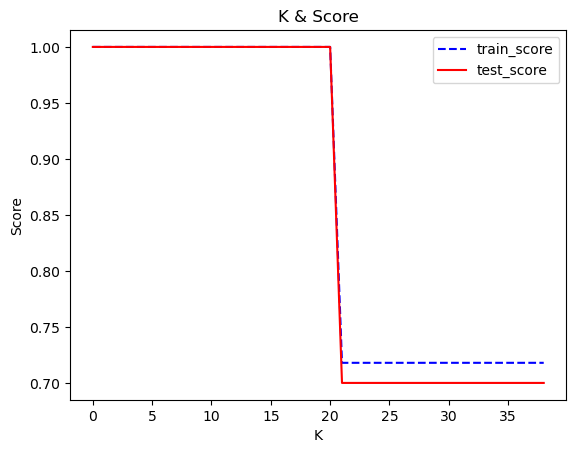

In [36]:
# K 개수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label='train_score')
plt.plot(test_scoreList, 'r-', label='test_score')
plt.title('K & Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [37]:
## 방법 2 : SVC
from sklearn.svm import SVC

fishModel2 = SVC()
fishModel2.fit(scaled_x_train, y_train)

SVC()

In [38]:
# 방법 3 : 선형 회귀
from sklearn.linear_model import LogisticRegression

fishModel3 = LogisticRegression()
fishModel3.fit(scaled_x_train, y_train)

LogisticRegression()

(5) 테스트 진행

In [39]:
fishModel.score(scaled_x_test, y_test)      # KNN

0.7

In [40]:
fishModel2.score(scaled_x_test, y_test)     # SVC

1.0

In [41]:
fishModel3.score(scaled_x_test, y_test)     # 선형 회귀

1.0

(6) 예측 <hr>

In [48]:
## 생선 무게, 길이 입력받은 후 결과 반환
new_wid, new_len = input('생선의 무게, 길이 입력(예: 90, 20) : ').split(',')

In [49]:
## 길이 25, 무게 160인 생선의 품종 예측 ----------------------------
new_data = pd.DataFrame([[new_wid, new_len]], columns = twoFishDF.columns[1:])
new_data

,Weight,Length
0,90,20


In [50]:
# 피쳐 스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [51]:
# 예측
y_pred = fishModel.predict(scaled_new_data)
y_pred  # [0] => 'Bream'

array([0], dtype=int64)